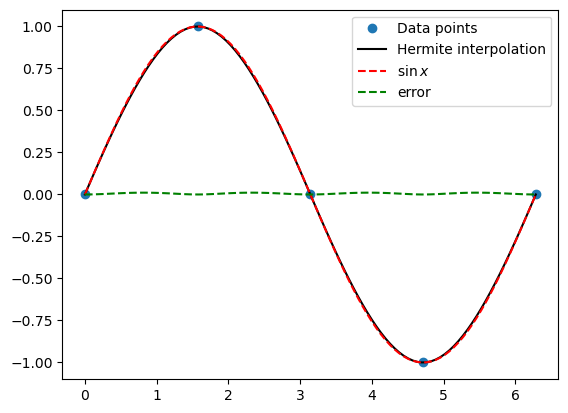

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
  
def hermite_cubic_interpolate(x, y, y_prime, xi):  
    """  
    分段Hermite三次插值  
  
    参数:  
    - x: 数据点的x坐标数组  
    - y: 数据点的y坐标数组  
    - y_prime: 数据点的导数数组  
    - xi: 需要插值的x坐标点数组  
  
    返回:  
    - yi: 插值点的y坐标数组  
    """  
    yi = np.zeros(len(xi))  
    for i in range(len(x) - 1):  
        # 对每一段进行插值  
        x0, x1 = x[i], x[i+1]  
        y0, y1 = y[i], y[i+1]  
        m0, m1 = y_prime[i] * (x1 - x0), y_prime[i+1] * (x1 - x0)  
          
        # 计算z和H(x)  
        for j, xj in enumerate(xi):  
            if x0 <= xj <= x1:  
                z = (xj - x0) / (x1 - x0)  
                Hx = (1 - 3*z**2 + 2*z**3) * y0 + (3*z**2 - 2*z**3) * y1 + \
                     (z - 2*z**2 + z**3) * m0 + (-z**2 + z**3) * m1  
                yi[j] = Hx  
    return yi  
  
# 示例  
x = np.linspace(0, 2 * np.pi, 5)
y = np.array([0, 1, 0, -1, 0])  
y_prime = np.array([1, 0, -1, 0, 1])  
xi = np.linspace(0, 2 * np.pi, 100)  
  
yi = hermite_cubic_interpolate(x, y, y_prime, xi)  
  
# 绘图  
plt.plot(x, y, 'o', label='Data points')  
plt.plot(xi, yi, 'k-', label='Hermite interpolation')  
plt.plot(xi, np.sin(xi), 'r--', label=r'$\sin x$')  
plt.plot(xi, np.abs(yi - np.sin(xi)), 'g--', label=r'error') 
plt.legend()  
plt.show()  

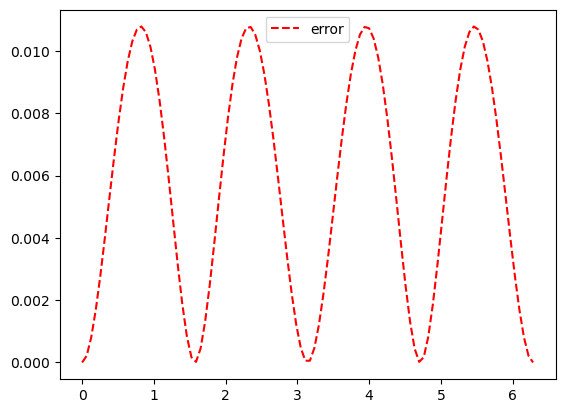

In [2]:
plt.plot(xi, np.abs(yi - np.sin(xi)), 'r--', label=r'error')  
plt.legend()  
plt.show()  